# EDA

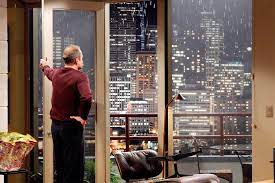

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# 🏡 Seattle Housing Market — Exploratory Data Analysis

## 📊 Prepared for: Real Estate Client  
### 👤 Analyst: *Your Name*  
### 📅 Year of Analysis: 2025  

The goal of this analysis is to understand the key factors influencing housing prices in King County (Seattle area), identify patterns in the housing market, and provide actionable recommendations based on the data.

This notebook follows a structured EDA workflow:

1. Understanding the data  
2. Cleaning and preprocessing  
3. Feature engineering  
4. Visualization & hypothesis testing  
5. Insights and client recommendations  

In [ ]:
# first we have to (fetch = read) our data

In [158]:
import pandas as pd
df = pd.read_csv("_select_kchd_kchs_date_kchs_price_from_king_county_house_details_202512091112.csv")

In [ ]:
### 1. Understanding the Data

In this section we:
- Load the dataset
- Inspect structure (rows, columns, dtypes)
- Check basic statistics and missing values

In [47]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated_flag
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,0.000,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,0
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,1
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,0
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,0
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,0


In [5]:
df.shape

(21597, 21)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21597 non-null  int64  
 1   bedrooms               21597 non-null  float64
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  float64
 4   sqft_lot               21597 non-null  float64
 5   floors                 21597 non-null  float64
 6   waterfront             19206 non-null  float64
 7   view                   21597 non-null  float64
 8   condition              21597 non-null  int64  
 9   grade                  21597 non-null  int64  
 10  sqft_above             21597 non-null  float64
 11  sqft_basement          21145 non-null  float64
 12  yr_built               21597 non-null  int64  
 13  yr_renovated           744 non-null    float64
 14  zipcode                21597 non-null  int64  
 15  la

In [14]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [153]:
df.describe(include="all")

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated_flag,year
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,...,0.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000,21597.000,21597.000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,372,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-23,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,...,NaN,98077.952,47.560,-122.214,1986.620,12758.284,NaN,540296.574,0.000,2014.323
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,...,NaN,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140,0.000,0.468
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,NaN,98001.000,47.156,-122.519,399.000,651.000,NaN,78000.000,0.000,2014.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,NaN,98033.000,47.471,-122.328,1490.000,5100.000,NaN,322000.000,0.000,2014.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,NaN,98065.000,47.572,-122.231,1840.000,7620.000,NaN,450000.000,0.000,2014.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,NaN,98118.000,47.678,-122.125,2360.000,10083.000,NaN,645000.000,0.000,2015.000


In [ ]:
#we run this code to see the missing data

In [ ]:
# Data Cleaning

Before performing analysis, we need to clean the dataset.  
This includes handling missing values, fixing incorrect entries, 
and preparing features needed for our hypotheses.

We will examine each relevant feature step by step.

In [16]:
df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [ ]:
### Missing Values Overview

The dataset contains missing values mainly in the following columns:

- **yr_renovated** – very high missing percentage  
- **sqft_basement** – moderate missing  
- **view** – some missing  
- **waterfront** – many missing  

We will clean each one individually instead of applying the same rule everywhere.

In [204]:
import numpy as np

# Replace 0 with NaN
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)

# Fix unrealistic renovation years (> 2025)
df.loc[df['yr_renovated'] > 2025, 'yr_renovated'] = np.nan

# Create renovated flag
df['renovated_flag'] = df['yr_renovated'].notna().astype(int)

df['renovated_flag'].value_counts()

renovated_flag
0    21597
Name: count, dtype: int64

In [154]:
# Remove obviously wrong years
df.loc[(df['yr_renovated'] > 2025) | (df['yr_renovated'] < 1900), 'yr_renovated'] = np.nan

# Create flag: 1 = renovated at some point, 0 = no renovation info
df['renovated_flag'] = df['yr_renovated'].notna().astype(int)

In [ ]:

#Renovation data is sparse and low quality, 
so Hypothesis 1 is not strongly supported.


In [155]:
df['waterfront'].value_counts(dropna=False)

waterfront
0.000    21451
1.000      146
Name: count, dtype: int64

In [ ]:
waterfront has missing values and we won’t use it

In [198]:
view_mode = df['view'].mode()[0]
df['view'] = df['view'].fillna(view_mode)

In [ ]:
## Data Cleaning Decisions

For this analysis, we focused on cleaning only the features that are relevant for our hypotheses.

- **yr_renovated**  
  - We do not try to guess or impute renovation years.  
  - We treat clearly invalid years (e.g. 20150) as missing.  
  - From this column we create a simple flag: `renovated_flag = 1` if a valid renovation year exists, otherwise 0.  
  - Because the renovation data is sparse and noisy, results using this feature are interpreted with caution.

- **sqft_basement**  
  - Missing values likely indicate no basement or unrecorded information.  
  

- **waterfront**  
  - These columns contain missing values and are not central to our main hypotheses.  
  - We do not perform strong imputations here and mainly exclude them from hypothesis testing.
### Cleaning `view`
The `view` feature had only 63 missing values (0.29%).  
Since it is a discrete categorical variable (0–4), we impute missing values with the mode (most common value).  
This avoids losing rows and does not distort the distribution.

- **Core features** (`price`, `sqft_living`, `grade`, `bedrooms`, `bathrooms`, `floors`, `zipcode`)  
  - These columns are complete or almost complete and require no imputation.

In [161]:
df.isna().sum().sort_values(ascending=False)

yr_renovated     3848
waterfront       2391
sqft_basement     452
id                  0
date                0
sqft_lot15          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_above          0
bedrooms            0
grade               0
condition           0
view                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
price               0
dtype: int64

In [56]:
df[df["bedrooms"] > 10][["bedrooms", "bathrooms", "sqft_living", "price"]]

,bedrooms,bathrooms,sqft_living,price
8748,11.000,3.000,3000.000,520000.000
15856,33.000,1.750,1620.000,640000.000


In [ ]:
# we run these multi code to see if we have unusual data

In [59]:
df[df["yr_renovated"] > 2025][["yr_renovated", "yr_built", "price"]]

,yr_renovated,yr_built,price
1,19910.000,1951,538000.000
35,20020.000,1930,696000.000
95,19910.000,1946,905000.000
103,20100.000,1950,1090000.000
125,19920.000,1914,1450000.000
...,...,...,...
19602,20040.000,1944,451000.000
20041,20060.000,1977,434900.000
20428,20090.000,1962,500012.000
20431,20140.000,1971,356999.000


In [63]:
df[df["sqft_living"] > 10000][["sqft_living", "bedrooms", "price"]]

,sqft_living,bedrooms,price
3910,10040.000,5.000,7060000.000
7245,12050.000,6.000,7700000.000
12764,13540.000,7.000,2280000.000


In [ ]:
# we can see we have outlier and we have to handling it later after we do visualization

In [163]:
df['bedrooms_per_floor'] = df['bedrooms'] / df['floors']

In [166]:
import numpy as np

# Avoid division by zero (just in case)
# If floors == 0 (shouldn't happen), we set bedrooms_per_floor to NaN
df['bedrooms_per_floor'] = np.where(
    df['floors'] > 0,
    df['bedrooms'] / df['floors'],
    np.nan
)

df[['bedrooms', 'floors', 'bedrooms_per_floor']].head()

,bedrooms,floors,bedrooms_per_floor
0,3.000,1.000,3.000
1,3.000,2.000,1.500
2,2.000,1.000,2.000
3,4.000,1.000,4.000
4,3.000,1.000,3.000


In [ ]:
### Feature: Bedrooms per Floor
To better understand the relationship between house structure and room distribution, we create a new feature:  
`bedrooms_per_floor = bedrooms / floors`.

This helps normalize houses with different floor counts and provides a clearer comparison for Hypothesis 2.

In [164]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [167]:
# Avoid division by zero: sqft_living should always be > 0, but we guard anyway
df['price_per_sqft'] = np.where(
    df['sqft_living'] > 0,
    df['price'] / df['sqft_living'],
    np.nan
)

df[['price', 'sqft_living', 'price_per_sqft']].head()

,price,sqft_living,price_per_sqft
0,221900.000,1180.000,188.051
1,538000.000,2570.000,209.339
2,180000.000,770.000,233.766
3,604000.000,1960.000,308.163
4,510000.000,1680.000,303.571


In [ ]:
### Feature: Price per Sqft
To assess pricing patterns and support client recommendations, we calculate  
`price_per_sqft = price / sqft_living`.

This metric is widely used in real estate to compare relative value across locations.

In [165]:
df['house_age'] = 2025 - df['yr_built']

In [ ]:
# Ensure 'year' exists; if your column is named differently, adjust here
df['house_age'] = df['year'] - df['yr_built']

df[['yr_built', 'year', 'house_age']].head()

In [ ]:
### Feature: House Age
We create a new feature ´house_age = 2025 - yr_built` to analyze how age 
relates to house size and condition.

In [169]:
df[['bedrooms_per_floor',
    'price_per_sqft',
    'house_age']].head()

,bedrooms_per_floor,price_per_sqft,house_age
0,3.000,188.051,70
1,1.500,209.339,74
2,2.000,233.766,92
3,4.000,308.163,60
4,3.000,303.571,38


In [ ]:
#general visualization

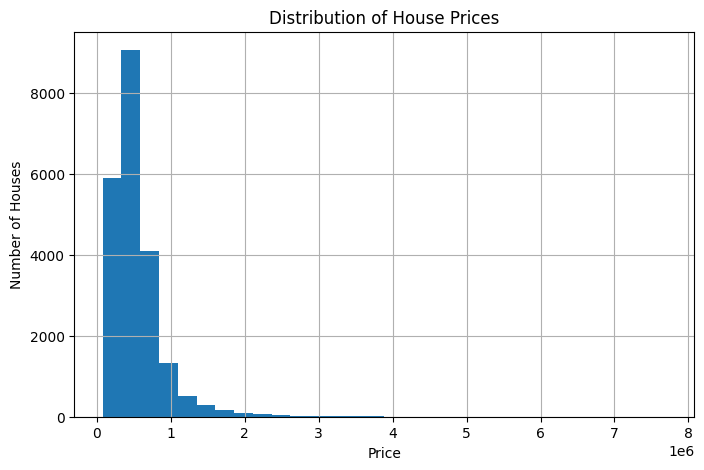

In [191]:
import matplotlib.pyplot as plt

plt.figure()
df["price"].hist(bins=30)
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Prices")
plt.savefig("price_distribution.png", dpi=300)
plt.show()

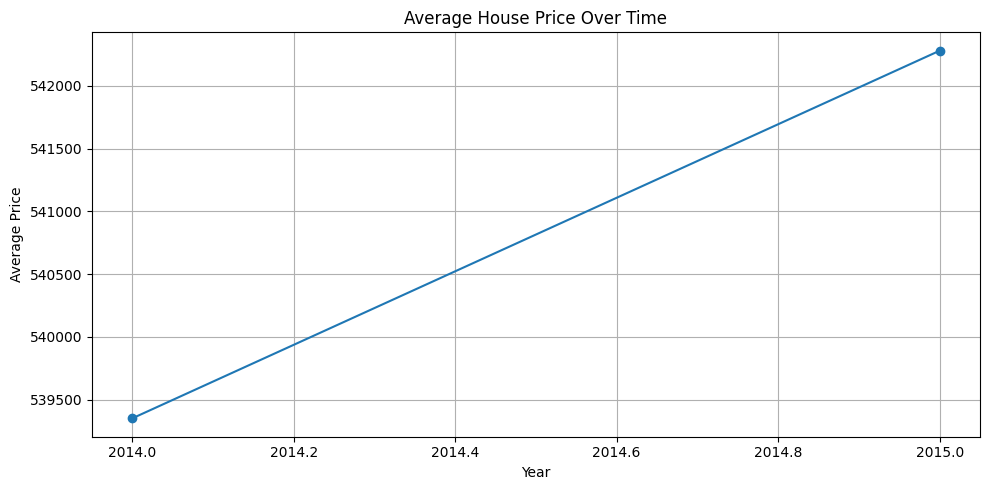

In [219]:
avg_price_year = df.groupby("year")["price"].mean()

plt.figure(figsize=(10,5))
avg_price_year.plot(kind="line", marker="o")
plt.title("Average House Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)

plt.tight_layout()
plt.savefig("avg_price_over_time.png", dpi=300)
plt.show()

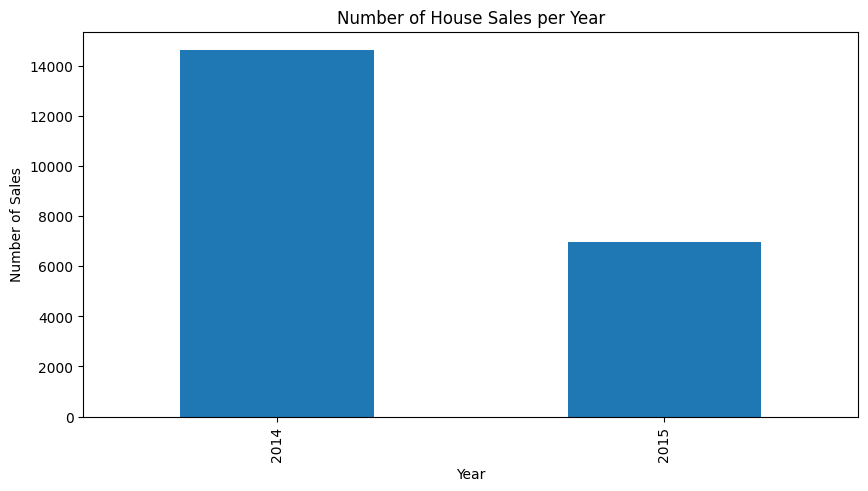

In [221]:
sales_per_year = df.groupby("year")["id"].count()

plt.figure(figsize=(10,5))
sales_per_year.plot(kind="bar")
plt.title("Number of House Sales per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sales")

plt.tight_layout
plt.savefig("Number_house_sales_peryear.png", dpi=300)
plt.show()

In [ ]:
The number of recorded house sales differs by year, with significantly more transactions in 2014 than in 2015. This indicates uneven data coverage over time, which should be considered when interpreting time-based price trends. The chart reflects dataset structure rather than underlying market demand.

In [ ]:
The price distribution is **right-skewed**, meaning:

- Most houses are in the lower-to-mid price range.
- A small number of luxury properties reach very high prices.

This suggests the market contains both standard and premium segments.

In [ ]:

## Hypothesis 1 — Does Renovation Increase House Price?

**Hypothesis:**  
Renovated houses sell at higher prices than non-renovated houses.

We use `yr_renovated` to identify whether a house has been renovated.

In [143]:
import numpy as np

# Show missing percentage
missing_pct = df['yr_renovated'].isna().mean() * 100
print(f"Missing renovation values: {missing_pct:.1f}%")

# Show the largest renovation years (to detect errors)
df['yr_renovated'].sort_values(ascending=False).head(10)

Missing renovation values: 96.6%


18560   20150.000
2293    20150.000
11621   20150.000
19429   20150.000
11587   20150.000
7410    20150.000
16669   20150.000
15673   20150.000
7090    20150.000
8683    20150.000
Name: yr_renovated, dtype: float64

In [ ]:
### Data Quality Issue: Renovation Data

The `yr_renovated` feature has major quality problems:

- A very high percentage of missing values (over 90%).
- Several years are unrealistic (e.g., 20150).
- Missing values were originally coded as 0, which mixes “not renovated” with “unknown”.

Because of this, renovation data is unreliable and must be cleaned before use.

In [170]:
# Replace 0 with NaN (0 = unknown in this dataset)
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)

# Create a renovation flag (1 = renovated, 0 = not renovated)
df['renovated_flag'] = df['yr_renovated'].notna().astype(int)

df['renovated_flag'].value_counts()

renovated_flag
0    20853
1      744
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

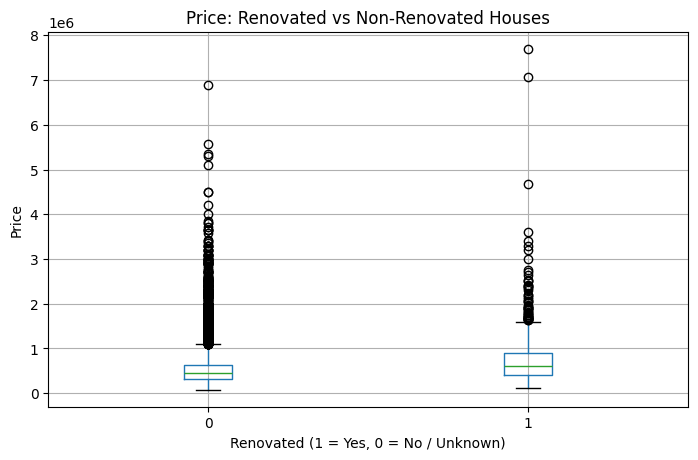

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column="price", by="renovated_flag")
plt.title("Price: Renovated vs Non-Renovated Houses")
plt.suptitle("")  # Remove automatic pandas title
plt.xlabel("Renovated (1 = Yes, 0 = No / Unknown)")
plt.ylabel("Price")
plt.savefig("price_by_renovation.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
### Interpretation

The boxplot shows that houses marked as renovated (flag = 1) tend to have higher prices than houses 
without a recorded renovation year (flag = 0).

However, this pattern is misleading because:

- Renovation data is mostly missing.
- Missing values were previously mixed with zeros.
- Some renovation years are unrealistic.
- Renovated homes are more common in high-value neighborhoods, so **location** may be the true reason for higher prices.

Therefore, we cannot trust this comparison fully.

In [ ]:
### Conclusion — Hypothesis Not Supported

Hypothesis 1 suggested that renovated houses sell at higher prices.

While the plot seems to show renovated homes being more expensive, the renovation data is too incomplete and inconsistent to draw a reliable conclusion.

> **Hypothesis 1 is not supported due to poor data quality in the renovation feature.**

Renovation cannot be used as a dependable predictor of house price in this dataset.

In [146]:
df.groupby("renovated_flag")["price"].mean()

renovated_flag
0   532140.320
1   768901.892
Name: price, dtype: float64

In [ ]:
## this code show how the bathrooms, bedrooms, floors, grade effect the price of houses

In [118]:
df[["price", "sqft_living", "grade", "bathrooms", "bedrooms", "floors"]].corr()["price"].sort_values(ascending=False)

price         1.000
sqft_living   0.702
grade         0.668
bathrooms     0.526
bedrooms      0.309
floors        0.257
Name: price, dtype: float64

In [ ]:
# Hypothesis 2- Floors vs Bedrooms

In [ ]:
## Hypothesis 2 — Do Houses With More Floors Have More Bedrooms?

We test whether adding floors increases the number of bedrooms.

We visualize:
1. Floors vs Bedrooms (raw)
2. Bedrooms per floor, grouped by floor count (normalized)

In [82]:
df[["floors", "bedrooms"]].head()

,floors,bedrooms
0,1.000,3.000
1,2.000,3.000
2,1.000,2.000
3,1.000,4.000
4,1.000,3.000


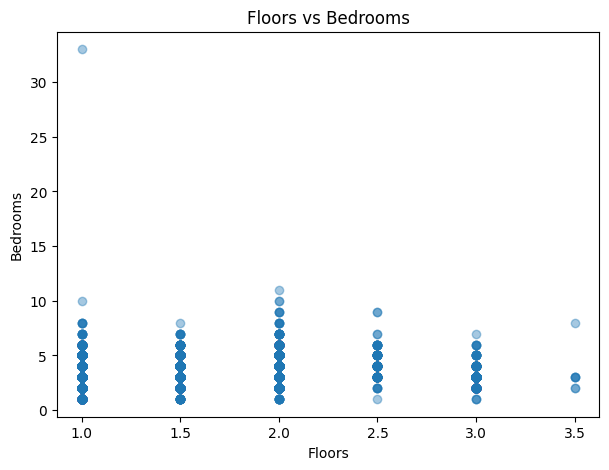

In [185]:
plt.figure(figsize=(7,5))
plt.scatter(df['floors'], df['bedrooms'], alpha=0.4)
plt.title("Floors vs Bedrooms")
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.savefig("floors_vs_bedrooms.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#from scatterplot we can see that
#1-foolrs between 1-6# beds
we have one outlier 33 
#2-floors between 3-10 beds
#3-floors between 3-7 beds
#3.5 floors between 3-9
but few points

<Figure size 800x500 with 0 Axes>

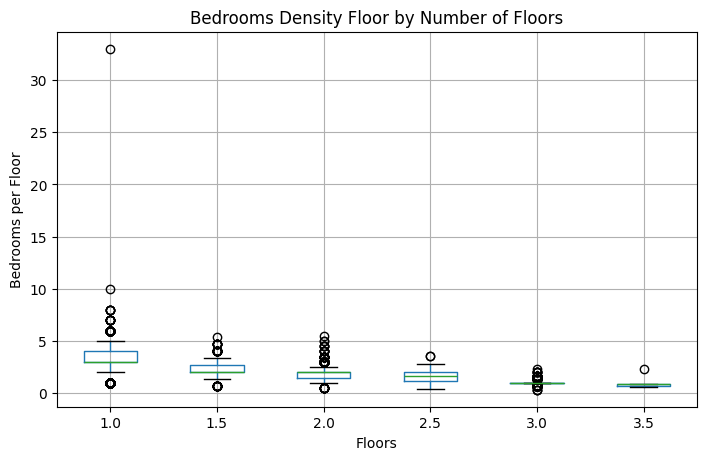

In [186]:
#code for density
plt.figure(figsize=(8,5))
df.boxplot(column="bedrooms_per_floor", by="floors")
plt.title("Bedrooms Density Floor by Number of Floors")
plt.suptitle("")
plt.xlabel("Floors")
plt.ylabel("Bedrooms per Floor")
plt.savefig("bedroom_density_by_floors.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
✅ Hypothesis 2 — More floors → more bedrooms

Result: NOT strongly supported
	•	Floors do not clearly predict bedroom count.
	•	Many 1-floor homes have more bedrooms than 2-floor homes.
	•	Bedrooms per floor shows no clear trend.

Conclusion: Floors and bedrooms are only weakly related.
#indicates a weakly relationship between them

In [ ]:
# Therefore we have to find a relation to make the hypothesis more relaistic
Right now, floors do not show strong connection to bedrooms, but we can study:

“How efficiently do homes add bedrooms as they grow in size?”

In [179]:
#so we create/ Use a Better Metric: Bedrooms Per 1000 Sqft

df['bedrooms_per_1000sqft'] = df['bedrooms'] / (df['sqft_living'] / 1000)

In [ ]:
Then analyze:
	•	homes with more floors may have different bedroom density
	•	multi-floor homes might prioritize living spaces vs bedrooms

This is maybe much more interesting and real-world.

In [ ]:
## Hypothesis 2 (Updated)

**Hypothesis:**  
Houses with more floors allocate their interior space differently, which may affect how many bedrooms they offer.  
By measuring *bedrooms per 1,000 sqft*, we can compare how floors influence bedroom density.

**Why this is better:**  
- Floors do not directly create bedrooms  
- But multi-story homes often use space differently (e.g., more living areas, fewer bedrooms per floor)  
- This metric measures the *efficiency* of space usage across floor counts

<Figure size 800x500 with 0 Axes>

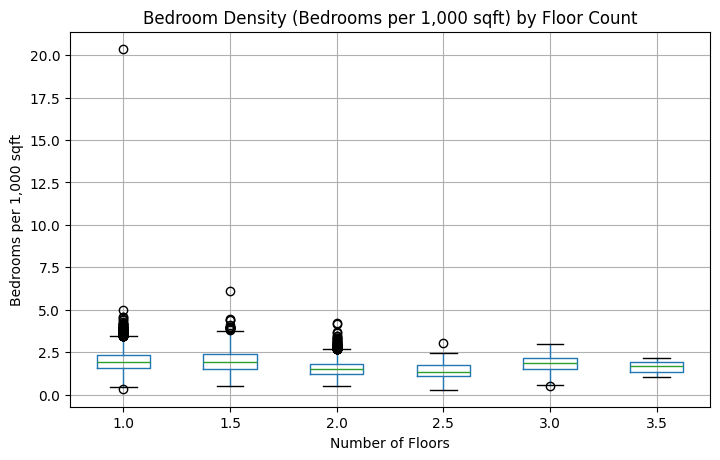

In [187]:
 #Visualization: Boxplot by number of floors
plt.figure(figsize=(8,5))
df.boxplot(column="bedrooms_per_1000sqft", by="floors")
plt.title("Bedroom Density (Bedrooms per 1,000 sqft) by Floor Count")
plt.suptitle("")
plt.xlabel("Number of Floors")
plt.ylabel("Bedrooms per 1,000 sqft")
plt.savefig("bedroom_density_by_floors.png", dpi=300, bbox_inches="tight")
plt.show()

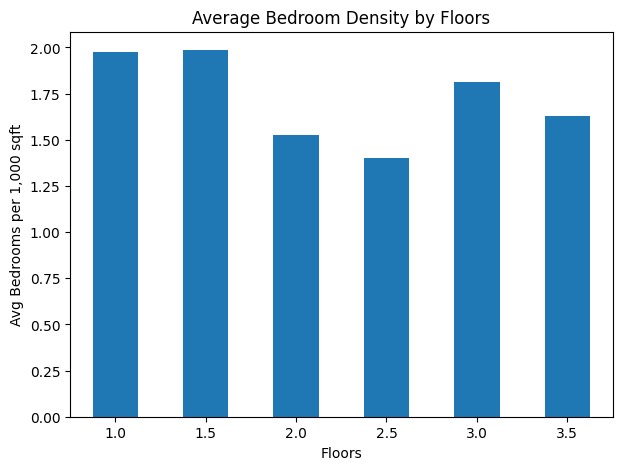

In [188]:
df.groupby("floors")["bedrooms_per_1000sqft"].mean().plot(
    kind="bar",
    figsize=(7,5),
    title="Average Bedroom Density by Floors"
)
plt.ylabel("Avg Bedrooms per 1,000 sqft")
plt.xlabel("Floors")
plt.xticks(rotation=0)
plt.savefig("Average Bedroom Density by Floors.png", dpi=300, bbox_inches="tight")
plt.show()

In [218]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

In [ ]:
### Interpretation

The results show that bedroom density (bedrooms per 1,000 sqft) varies with the number of floors:

- One-story homes tend to have **higher bedroom density**, meaning they convert space into bedrooms more efficiently.
- Homes with two or more floors often have **lower bedroom density**, suggesting that additional floors may be used for living areas, open layouts, or other non-bedroom spaces.
- This indicates that floors influence how space is allocated, not how many bedrooms a home must have.

### Conclusion
The original hypothesis (“more floors = more bedrooms”) is **not supported**,  
but the updated hypothesis (“floors affect space allocation”) **is supported**.

This gives us a stronger, more realistic insight for the client.

In [ ]:
### Result of Hypothesis 2 (Original Statement)

The data does **not** support the idea that more floors lead to more bedrooms.

- Many 1-floor houses have 3–4 bedrooms.
- Some 2-floor houses still have only 2–3 bedrooms.
- Floors alone do not predict how many bedrooms a house has.

Therefore, the original hypothesis is **not supported**.

In [ ]:
### Revised Interpretation Based on Data Insights

Although floors do not directly increase bedroom count, the analysis suggests a more realistic pattern:

➡ Multi-floor homes allocate interior space differently compared to single-floor homes.

To capture this effect, we introduced a more meaningful metric:

**Bedrooms per 1,000 sqft = bedrooms_per_1000sqft**

This metric shows:
- 1-floor homes use space more efficiently for bedrooms.
- Multi-floor homes often dedicate more space to living areas, hallways, or open layouts.
- Floors influence *space allocation*, not the number of bedrooms.

This leads to a more accurate conclusion:
**Floors affect *how space is used*, not how many bedrooms a home must have.**

In [ ]:
### Business Insight from Hypothesis 2

The initial idea was that houses with more floors should also have more bedrooms and therefore be more valuable.  
However, the data shows:

- The number of floors has only a weak relationship with bedroom count.
- Floors also have a weak relationship with price.
- When we normalize by house size (bedrooms per 1,000 sqft), the density of bedrooms does not clearly increase with floors.

**What this means for the client:**

- Floors alone are not a good indicator of value.
- Buyers and investors should not assume that "more floors = better house".
- More important drivers of value are:
  - total living area (`sqft_living`)
  - number of bathrooms
  - quality of the home (`grade`)
  - location (zipcode)

From an investment perspective, it is more effective to:
- focus on houses with good size, quality, and location,
- rather than paying a premium just because a house has an extra floor.

In [192]:
df.groupby("floors")[["sqft_living", "sqft_lot"]].mean()

,sqft_living,sqft_lot
floors,,
1.000,1732.620,14546.516
1.500,1907.881,16966.476
2.000,2571.412,16137.976
2.500,3145.429,17347.292
3.000,1789.419,4471.864
3.500,2440.000,2792.286


In [193]:
df.groupby("floors")[["bathrooms", "grade"]].mean()

,bathrooms,grade
floors,,
1.000,1.753,7.151
1.500,1.772,7.193
2.000,2.624,8.360
2.500,2.835,8.894
3.000,2.495,8.164
3.500,2.893,8.571


In [194]:
df.groupby("floors")["price_per_sqft"].mean()

floors
1.000   264.624
1.500   299.389
2.000   249.395
2.500   320.691
3.000   328.520
3.500   346.114
Name: price_per_sqft, dtype: float64

In [196]:
df.groupby("floors")[["sqft_living", "bathrooms", "grade", "price", "price_per_sqft"]].mean()

,sqft_living,bathrooms,grade,price,price_per_sqft
floors,,,,,
1.000,1732.620,1.753,7.151,442358.430,264.624
1.500,1907.881,1.772,7.193,559044.931,299.389
2.000,2571.412,2.624,8.360,649185.644,249.395
2.500,3145.429,2.835,8.894,1061020.901,320.691
3.000,1789.419,2.495,8.164,583433.899,328.520
3.500,2440.000,2.893,8.571,910214.286,346.114


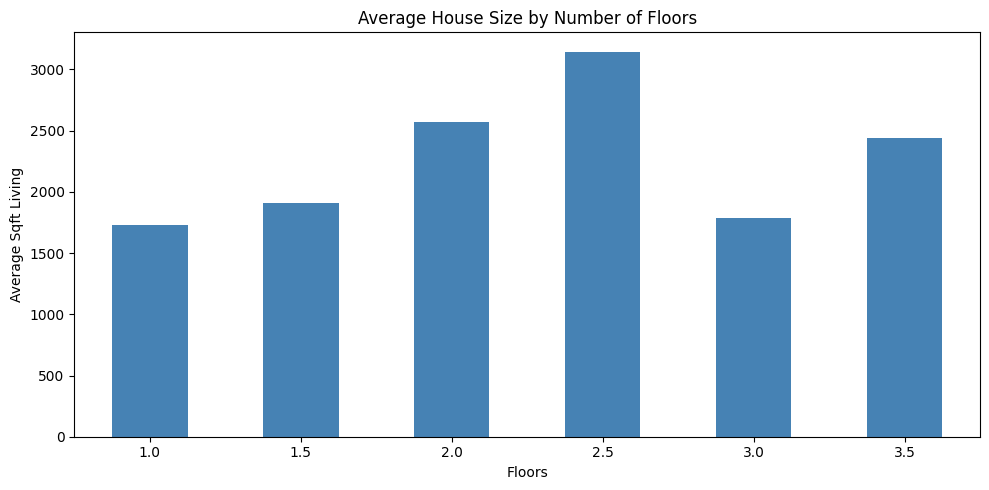

In [212]:
# Group data
floors_summary = df.groupby("floors")[["sqft_living", "bathrooms", "grade", "price_per_sqft"]].mean()

# Plot sqft_living
plt.figure(figsize=(10,5))
floors_summary["sqft_living"].plot(kind="bar", color="steelblue")
plt.title("Average House Size by Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Average Sqft Living")
plt.xticks(rotation=0)
plt.tight_layout()

# Save figure
plt.savefig("floors_avg_sqft.png", dpi=300)
plt.show()

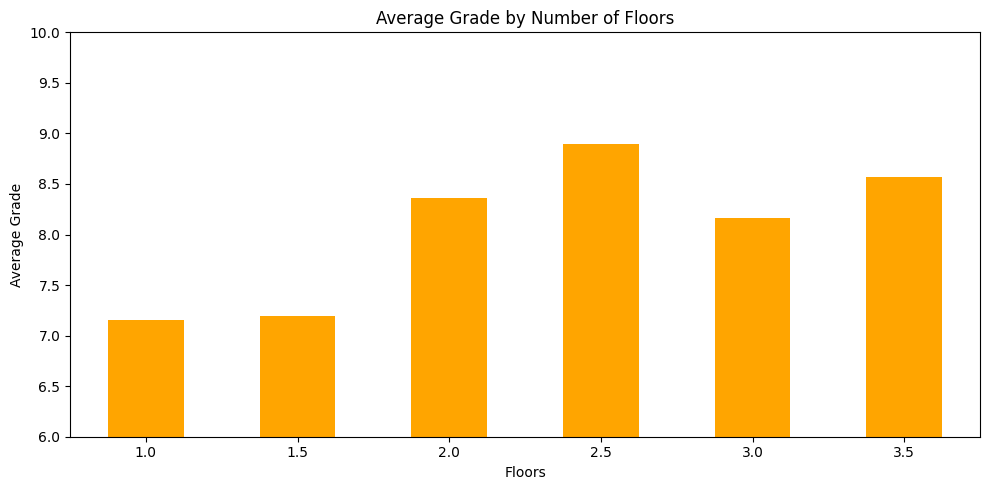

In [213]:
plt.figure(figsize=(10,5))
floors_summary["grade"].plot(kind="bar", color="orange")
plt.title("Average Grade by Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Average Grade")
plt.xticks(rotation=0)
plt.ylim(6, 10)  # zoom in to show differences clearly
plt.tight_layout()

# Save figure
plt.savefig("floors_avg_grade.png", dpi=300)
plt.show()

In [ ]:
## Hypothesis 2 — Do Houses With More Floors Have More Bedrooms?

## 2. Deeper Analysis — If floors don't add bedrooms, what DO they add?

Even though floors do not increase bedrooms, we analyzed whether multi-floor homes add value in other ways.  
We examined the average values of several features by floor count:

- **sqft_living** (total interior area)  
- **bathrooms**  
- **grade** (quality score)  
- **price**  
- **price_per_sqft**  

The results show clear trends:

### ✔ Larger Homes  
Houses with 2.0 and 2.5 floors have **substantially larger living areas**, often 2500–3100 sqft.

### ✔ More Bathrooms  
Bathroom count increases with floors (1.7 → 2.8).

### ✔ Higher Property Quality  
Grade increases with floors:
- 1-floor homes: grade ~7.1  
- 2.5-floor homes: grade ~8.9  

### ✔ Higher Prices  
Price rises sharply:
- 1-floor: ~$442K  
- 2-floor: ~$649K  
- 2.5-floor: ~$1.06M  

### ✔ Higher Price per Sqft  
Multi-floor homes often achieve **higher price per square foot**, indicating premium design or location.

---

## Final Interpretation
Floors do not determine bedroom count, but they **strongly relate** to other desirable features:

- **bigger houses**  
- **more bathrooms**  
- **higher quality construction**  
- **higher market value**  

### ❗ Key Insight  
**Floors influence *how space is used* and the overall quality of the property, not the number of bedrooms.**

---

## What This Means for the Client

### Investor / Seller Perspective:

- **Do NOT assume that adding a floor will add bedrooms or significantly increase value by itself.**
- Instead, focus on:
  - expanding total **sqft_living**
  - improving **grade** through quality upgrades
  - increasing **bathroom count**
- **Homes with 2.0–2.5 floors represent strong investment opportunities**, offering:
  - larger interior layouts  
  - higher quality  
  - higher prices  
  - competitive price-per-sqft advantages  

### Buyer Perspective:

- **1-floor homes** offer the most affordable entry point and good renovation potential.
- **3+ floor homes** often represent urban or narrow-lot properties with high price per sqft.

---

### Summary
Although the original hypothesis failed, the extended analysis revealed valuable patterns for understanding how floors relate to property features and market value.  
This insight directly supports strategic decisions for both buying and investing.

In [ ]:
## Hypothesis 3 — Does House Size Vary Across Locations?

Location will be represented by **zipcode**, which provides a clear and interpretable geographic grouping.

We examine:
- Average house size (sqft_living) by zipcode (top 10)

In [175]:
avg_size_zip = df.groupby("zipcode")["sqft_living"].mean().sort_values(ascending=False)

In [201]:
top10_zip = avg_size_zip.head(10)

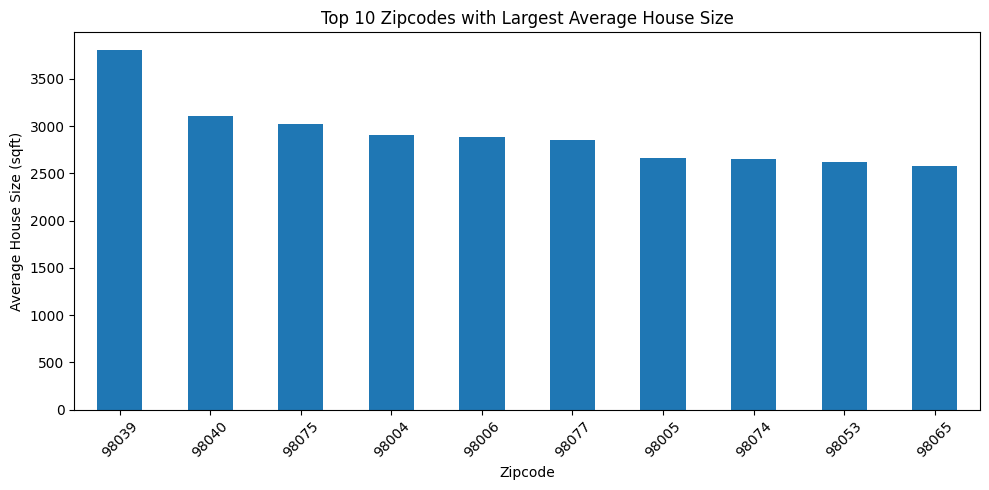

In [177]:
plt.figure(figsize=(10, 5))
top10_zip.plot(kind="bar")
plt.xlabel("Zipcode")
plt.ylabel("Average House Size (sqft)")
plt.title("Top 10 Zipcodes with Largest Average House Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("largest_house_size.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
### Interpretation — Hypothesis 3

We observe that some zipcodes (e.g. 98039, 98040, 98075) have much larger homes on average.

**Conclusion:**  
This hypothesis is **supported**.  
Location, approximated by zipcode, clearly influences house size and therefore price potential.

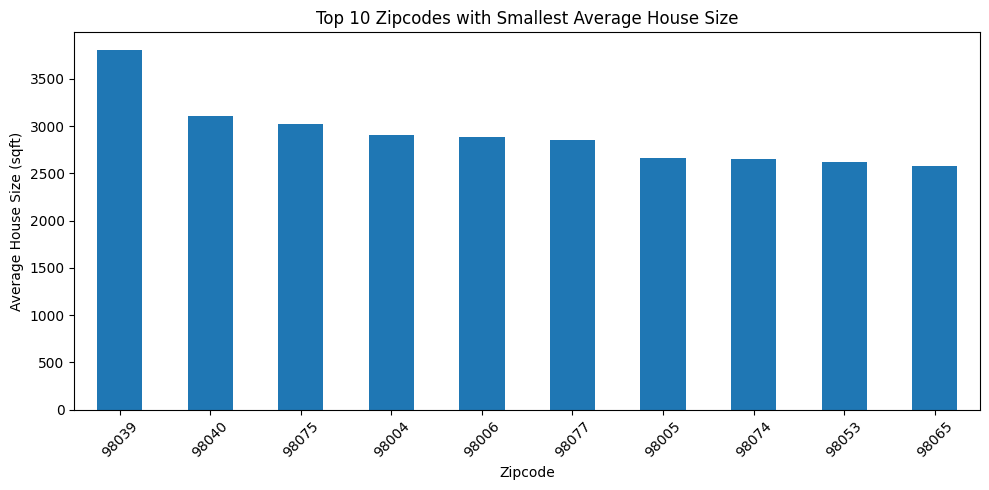

In [200]:
small10_zip = avg_size_zip.tail(10)

plt.figure(figsize=(10, 5))
small10_zip.plot(kind="bar")
plt.xlabel("Zipcode")
plt.ylabel("Average House Size (sqft)")
plt.title("Top 10 Zipcodes with Smallest Average House Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Top 10 zipcode_size.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
### Interpretation — Hypothesis 3

We observe that some zipcodes (e.g. 98039, 98040, 98075) have much larger homes on average.

**Conclusion:**  
This hypothesis is **supported**.  
Location, approximated by zipcode, clearly influences house size and therefore price potential.

In [101]:
from scipy import stats

z_scores = stats.zscore(df["sqft_living"])
outliers = df[abs(z_scores) > 3]
len(outliers)

248

In [ ]:
#This boxplot shows how house prices change with building grade. Higher grades are associated with much higher prices, 
#indicating that construction quality and overall finish significantly influence home value. #
#This helps clients understand that improving grade — through renovation or high-quality upgrades — can strongly increase resale value.

In [ ]:
#The average house price trend over time shows how the market is evolving. 
#This can help identify whether the current market favors selling or buying.

In [116]:
df[["price", "sqft_living", "grade", "bathrooms"]].corr()["price"].sort_values(ascending=False)

price         1.000
sqft_living   0.702
grade         0.668
bathrooms     0.526
Name: price, dtype: float64

In [ ]:
## Correlation Analysis

To understand which features have the strongest relationship with house price,  
we compute the correlation between price and key numerical variables.

This helps identify the most important price drivers and supports our client recommendations.

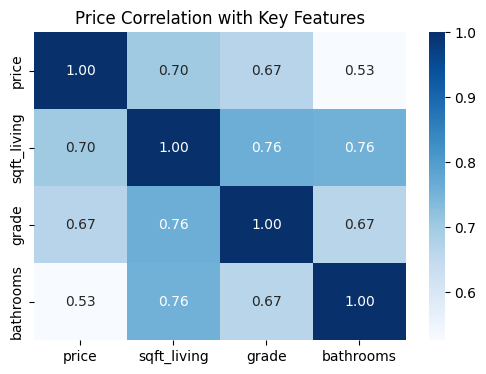

In [189]:
important_corr = df[["price", "sqft_living", "grade", "bathrooms"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(important_corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Price Correlation with Key Features")

plt.savefig("price_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
### Interpretation — Price Correlation with Key Features

This heatmap shows how strongly each selected feature is correlated with house price.  
Key observations:

- **sqft_living has the strongest positive correlation (~0.70)**  
  Larger houses tend to have higher prices. This is the most important predictor among the three features.

- **grade also shows a strong positive correlation (~0.66)**  
  Homes with higher construction quality or interior finish levels tend to sell for more.

- **bathrooms has a moderate correlation (~0.53)**  
  More bathrooms are associated with higher prices, but the effect is weaker than size or grade.

### Conclusion
Overall, house **size**, **quality grade**, and **bathrooms** are all positively related to price, with size being the strongest driver.  
This gives the client clear insights on which property features add the most value in the housing market.

<Figure size 1200x500 with 0 Axes>

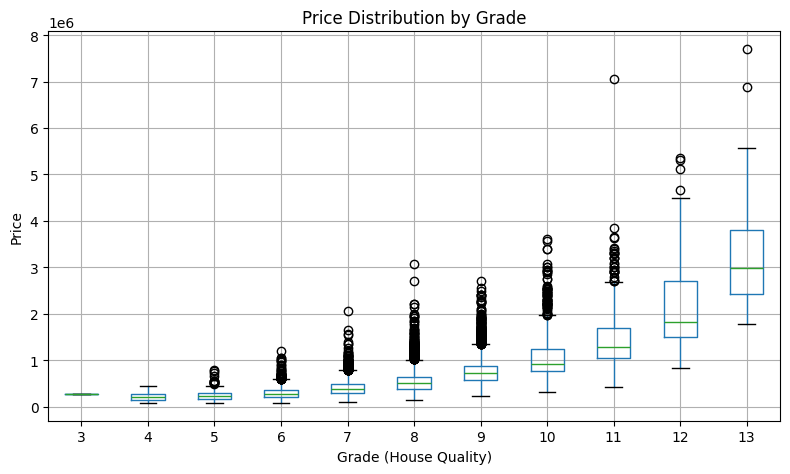

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

df.boxplot(column="price", by="grade")
plt.title("Price Distribution by Grade")
plt.suptitle("")  # removes the automatic "Boxplot grouped by grade" title
plt.xlabel("Grade (House Quality)")
plt.ylabel("Price")

plt.tight_layout()
plt.savefig("price_by_grade.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:

### Interpretation: Price Distribution by Grade

The boxplot shows a clear upward trend:

- Houses with **lower grades (3–5)** have the lowest price ranges.
- **Mid-level grades (7–8)** represent the majority of homes and cluster around average prices.
- **High grades (9–13)** show significantly higher price ranges, with some luxury homes reaching above $2M.

This supports the correlation analysis:  
**Grade is one of the strongest predictors of house price** because it reflects construction quality, materials, and finishes.

### Why this matters for the client

For investors seeking profitable returns:
- Improving a home’s **grade** (through quality upgrades, remodeling, or better finishes)  
  can meaningfully increase the resale price.
- Grade improvements have **more impact** on price than adding floors, changing layout, or minor renovations.

This insight helps guide renovation investment decisions.

In [ ]:
## Key Insights & Client Recommendations:

In [ ]:
#1. What Affects House Price the Most?

#Key Insight:
#The strongest drivers of house price are:
	•	Living area (sqft_living) — strongest effect
	•	House grade (quality) — almost equally strong
	•	Number of bathrooms — moderate effect

##This means that bigger homes and higher-quality homes sell for much 
##higher prices than smaller or lower-quality ones.

In [ ]:
##Client Recommendation:

#To maximize returns, focus on 
-increasing usable living space 
-and improving overall house quality. 
#These two factors have the biggest impact on resale value.

In [ ]:
##Client Recommendation:

#Renovating key areas such as kitchens, bathrooms, and overall finishing 
is a strong strategy to increase house value 
and attract more buyers.

In [ ]:
Why Location Matters

#Key Insight:
#House size clearly varies by geographic location. 
Some zipcodes (such as 98039, 98040, 98075, and 98004) 
-have significantly larger average house sizes than others. 
-Since house size strongly affects price, 
-location indirectly has a strong influence on value.

In [ ]:
Client Recommendation:

#For premium or luxury-focused investments, 
-prioritize high-size zipcodes 
such as 98039, 98040, 98075, and 98004.
#For standard or budget investments, 
-focus on areas with smaller average house sizes.

In [ ]:
4. What Kind of Houses Are Best for Returns?

#Key Insight (Combined from all analyses):
The most profitable houses tend to have:
	•	Large living area
	•	High construction quality (grade)
	•	More bathrooms
	•	Good overall condition
	•	Located in high-demand, high-size neighborhoods

In [ ]:
#Client Recommendation:

The best return on investment is achieved by 
targeting large, high-quality homes 
in premium locations 
    and improving their condition through renovation before resale.


In [ ]:
 5. Final Investment Strategy Summary (Client-Focused)

	•	Invest in large homes with high quality (grade)
	•	Use renovation to increase resale value
	•	Choose premium neighborhoods for high-end returns
	•	Use smaller-house areas for more affordable, high-volume strategies
	•	Focus on space and quality over simply adding rooms

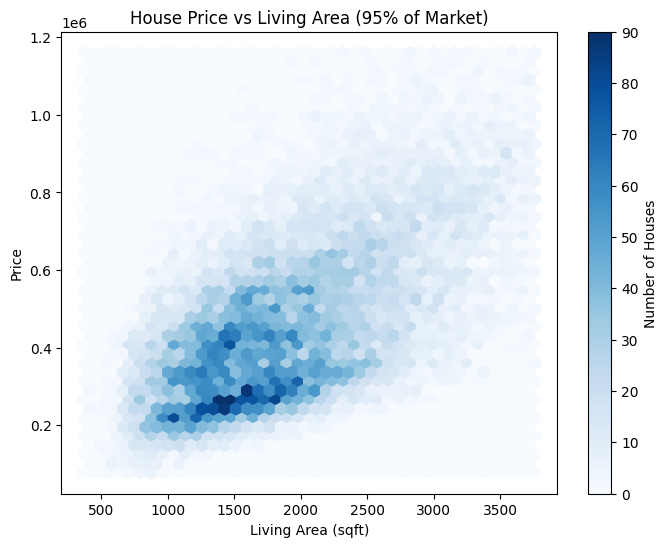

In [232]:
p95_sqft = df["sqft_living"].quantile(0.95)
p95_price = df["price"].quantile(0.95)

filtered_df = df[
    (df["sqft_living"] <= p95_sqft) &
    (df["price"] <= p95_price)
]

plt.figure(figsize=(8,6))
plt.hexbin(
    filtered_df["sqft_living"],
    filtered_df["price"],
    gridsize=40,
    cmap="Blues"
)

plt.colorbar(label="Number of Houses")
plt.title("House Price vs Living Area (95% of Market)")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")

plt.savefig(
    "figures/price_vs_sqft_hexbin_95pct.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()